# seaborn tutorial

lets learn some seaborn basics on the __most important__ dataset available.

<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>

(the original) Pokemon stats

![Alt text](images/poke1.jpg)

### imports

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


## load dataset


In [2]:
df = pd.read_csv('Pokemon.csv', encoding ='latin1')
df.head()

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Stage,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


## scatterplot

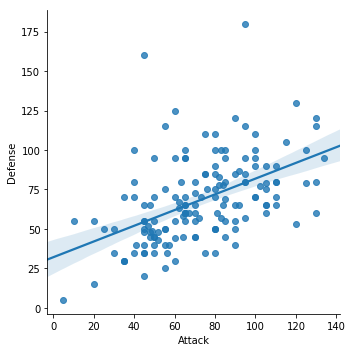

In [5]:
sns.lmplot(x='Attack', y='Defense', data=df)
plt.show()

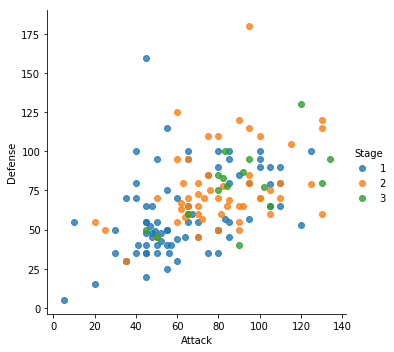

In [6]:
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage
plt.show()

we can tweak the plot using matplotlib methods

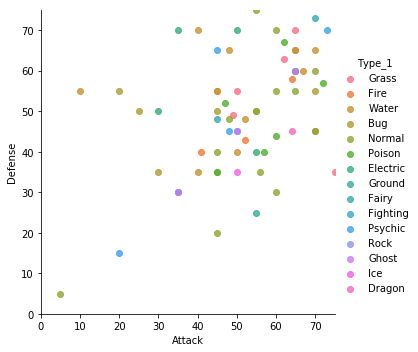

In [7]:
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Type_1')   # Color by evolution stage

# Tweak using Matplotlib
plt.ylim(0, 75)
plt.xlim(0, 75)

plt.show()

pandas helps us organise the data and quickly plot stuff strait out of the DF

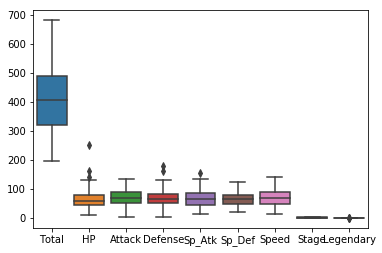

In [8]:
sns.boxplot(data=df)
plt.show()

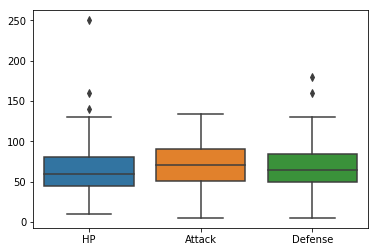

In [9]:
sns.boxplot(data=df[['HP','Attack', 'Defense']])
plt.show()

### overlaying
lets compare attack by pokemon type. are there weaker/stronger types?


first, how is attack distributed?

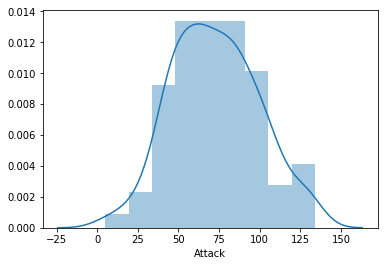

In [10]:
sns.distplot(df['Attack'])
plt.show()

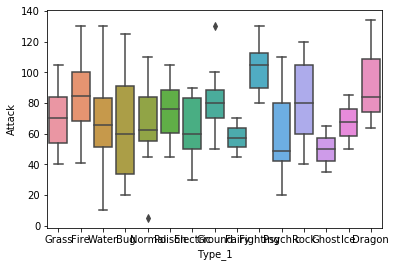

In [11]:
sns.boxplot(x='Type_1', y='Attack', data=df)
plt.show()

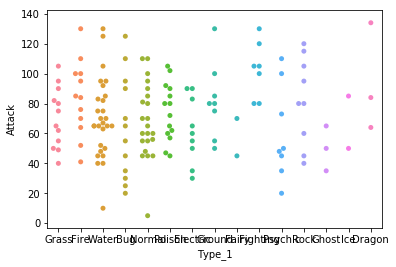

In [12]:
sns.swarmplot(x='Type_1', y='Attack', data=df)
plt.show()

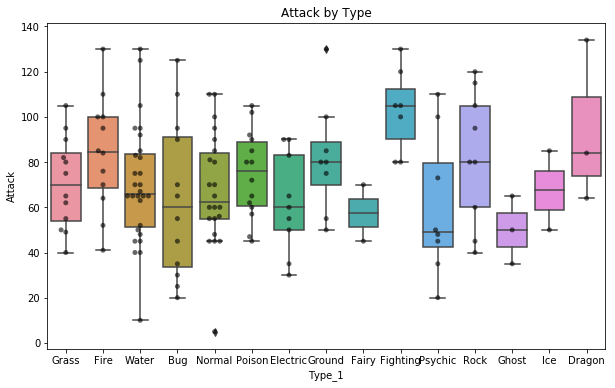

In [13]:

# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.boxplot(x='Type_1',
               y='Attack', 
               data=df)
 
sns.swarmplot(x='Type_1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.6) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

plt.show()

we can also look at joint distributions

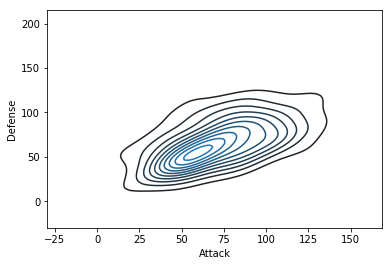

In [14]:
sns.kdeplot(df['Attack'], df['Defense'])
plt.show()

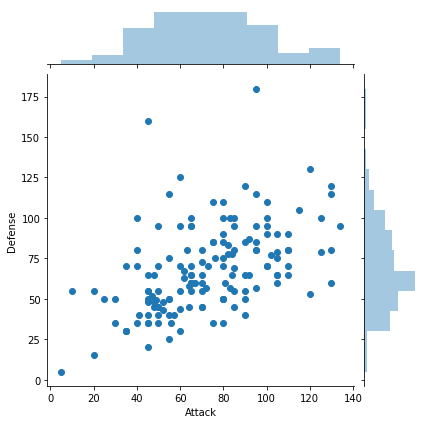

In [15]:
sns.jointplot(x='Attack', y='Defense', data=df)
plt.show()

               HP    Attack   Defense    Sp_Atk    Sp_Def     Speed
HP       1.000000  0.306768  0.119782  0.236649  0.490978 -0.040939
Attack   0.306768  1.000000  0.491965  0.146312  0.369069  0.194701
Defense  0.119782  0.491965  1.000000  0.187569  0.139912 -0.053252
Sp_Atk   0.236649  0.146312  0.187569  1.000000  0.522907  0.411516
Sp_Def   0.490978  0.369069  0.139912  0.522907  1.000000  0.392656
Speed   -0.040939  0.194701 -0.053252  0.411516  0.392656  1.000000


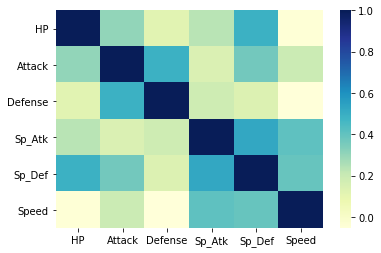

In [16]:
# Calculate correlations
corr = df.drop(['Name','Type_1', 'Type_2', 'Total', 'Stage', 'Legendary'], axis=1).corr()
print(corr)
# Heatmap
sns.heatmap(corr,cmap="YlGnBu")
plt.show()